In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 180)


In [2]:
# === PATH TO PREPROCESSED FEATURES FROM LAST WEEK ===
DATA_PATH = r"C:\Users\lawre\Downloads\eda_outputs\company_features_purchase_behavior.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (100, 195)


,Company_ID,transactions_count,unique_products,total_quantity,avg_quantity,total_spend,avg_spend,max_spend,spend_std,avg_price_paid,price_std,recency_days,avg_days_between_tx,spend_last30,spend_prev30,spend_growth_30,Company_Profit,company_name_len,address_len,Company_Name_Dynamic Ventures 73,Company_Name_Dynamic Enterprises 21,Company_Name_Dynamic Solutions 17,Company_Name_Dynamic Solutions 7,Company_Name_Dynamic Ventures 11,Company_Name_Dynamic Ventures 46,Company_Name_Elite Associates 59,Company_Name_Elite Ventures 5,Company_Name_Elite Consulting 88,Company_Name_Elite Corp 27,Company_Name_Elite Enterprises 81,Company_Name_Global Corp 48,Company_Name_Global Holdings 51,Company_Name_Global Partners 2,Company_Name_Global Corp 72,Company_Name_Global Enterprises 9,Company_Name_Global Partners 53,Company_Name_Global Solutions 100,Company_Name_Global Solutions 61,Company_Name_Global Solutions 69,Company_Name_Global Solutions 89,Company_Name_Global Ventures 60,Company_Name_Green Consulting 33,Company_Name_Green Corp 16,Company_Name_Green Industries 47,Company_Name_Green Partners 80,Company_Name_Green Solutions 84,Company_Name_Green Holdings 25,Company_Name_Green Industries 75,Company_Name_Green Network 95,Company_Name_Green Ventures 85,Company_Name_Innovative Corp 92,Company_Name_Innovative Solutions 68,Company_Name_Innovative Consulting 19,Company_Name_Innovative Enterprises 15,Company_Name_Innovative Holdings 55,Company_Name_Innovative Holdings 93,Company_Name_Innovative Network 54,Company_Name_Innovative Partners 78,Company_Name_Pioneer Ent.s 56,Company_Name_Pioneer Associates 94,Company_Name_Pioneer Consulting 20,Company_Name_Pioneer Corp 34,Company_Name_Pioneer Corp 57,Company_Name_Pioneer Network 10,Company_Name_Pioneer Solutions 86,Company_Name_Pioneer Ventures 98,Company_Name_Prime Consulting 32,Company_Name_Prime Consulting 39,Company_Name_Prime Associates 71,Company_Name_Prime Consulting 77,Company_Name_Prime Corp 23,Company_Name_Prime Holdings 37,Company_Name_Prime Holdings 90,Company_Name_Prime Industries 45,Company_Name_Prime Industries 82,Company_Name_Prime Network 4,Company_Name_Prime Network 70,Company_Name_Quantum Enterprises 13,Company_Name_Quantum Associates 3,Company_Name_Quantum Associates 67,Company_Name_Quantum Holdings 30,Company_Name_Quantum Holdings 97,Company_Name_Quantum Network 12,Company_Name_Quantum Network 43,Company_Name_Quantum Solutions 62,Company_Name_Sky Holdings 42,Company_Name_Sky Industries 29,Company_Name_Sky Associates 50,Company_Name_Sky Consulting 31,Company_Name_Sky Consulting 64,Company_Name_Sky Ent.s 22,Company_Name_Sky Ent.s 66,Company_Name_Sky Network 38,Company_Name_Sky Partners 41,Company_Name_Sky Ventures 79,Company_Name_Tech Enterprises 1,Company_Name_Tech Enterprises 83,Company_Name_Tech Network 35,Company_Name_Tech Solutions 24,Company_Name_Tech Solutions 44,Company_Name_Tech Ventures 87,Company_Name_Tech Associates 26,Company_Name_Tech Associates 65,Company_Name_Tech Corp 63,Company_Name_Tech Holdings 49,Company_Name_Tech Industries 91,Company_Name_Tech Ventures 58,Company_Name_Tech Ventures 76,"Address_Alabang-Zapote Rd, Barangay 456, Baguio, Philippines","Address_Alabang-Zapote Rd, Barangay 456, Mandaluyong, Philippines","Address_Alabang-Zapote Rd, Barangay 456, Manila, Philippines","Address_Alabang-Zapote Rd, Barangay 505, Parañaque, Philippines","Address_Alabang-Zapote Rd, Barangay 505, Quezon City, Philippines","Address_Alabang-Zapote Rd, Barangay 707, Cebu City, Philippines","Address_Alabang-Zapote Rd, Barangay 789, Baguio, Philippines","Address_Alabang-Zapote Rd, Barangay 789, Pasig, Philippines","Address_Alabang-Zapote Rd, Brgy. 303, Baguio, Philippines","Address_Alabang-Zapote Rd, Brgy. 456, Cebu City, Philippines","Address_Alabang-zapote rd, barangay 606, pasig, philippines","Address_Ayala Avenue, Barangay 101, Makati, Philippines","Address_Ayala Avenue, Barangay 404, Pasig, Philippines","Address_Ayala Avenue, Barangay 456, Mandaluyong, Philippines","Address_Ayala Av

In [3]:
print("\n=== DATA TYPES ===")
df.info()

print("\n=== BASIC STATISTICS ===")
display(df.describe().T)



=== DATA TYPES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 195 entries, Company_ID to will_buy_next_30d
dtypes: bool(175), float64(14), int64(6)
memory usage: 32.8 KB

=== BASIC STATISTICS ===


,count,mean,std,min,25%,50%,75%,max
Company_ID,100.0,5.050000e+01,2.901149e+01,1.000000e+00,2.575000e+01,5.050000e+01,7.525000e+01,1.000000e+02
transactions_count,100.0,1.796000e+01,4.435668e+00,7.000000e+00,1.500000e+01,1.800000e+01,2.100000e+01,3.000000e+01
unique_products,100.0,1.175000e+01,2.284666e+00,6.000000e+00,1.000000e+01,1.200000e+01,1.300000e+01,1.600000e+01
total_quantity,100.0,1.912700e+02,5.208363e+01,6.200000e+01,1.555000e+02,1.950000e+02,2.235000e+02,3.300000e+02
avg_quantity,100.0,1.064445e+01,1.590681e+00,5.615385e+00,9.918333e+00,1.069925e+01,1.153536e+01,1.450000e+01
total_spend,100.0,2.578298e+07,7.465105e+06,7.940373e+06,2.125176e+07,2.615122e+07,3.097354e+07,4.809495e+07
avg_spend,100.0,1.431923e+06,2.391455e+05,7.105179e+05,1.306958e+06,1.435090e+06,1.573246e+06,2.033158e+06
max_spend,100.0,3.297188e+06,6.471378e+05,1.764000e+06,2.902200e+06,3.225600e+06,3.769418e+06,4.480000e+06
spend_std,100.0,8.873533e+05,1.598399e+05,5.012841e+05,7.913363e+05,8.753890e+05,9.925168e+05,1.233949e+06
avg_price_paid,100.0,1.349750e+05,1.009616e+04,1.077924e+05,1.284570e+05,1.349847e+05,1.417730e+05,1.609530e+05


In [4]:
TARGET = "will_buy_next_30d"

X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Feature matrix shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))


Feature matrix shape: (100, 194)
Target distribution:
will_buy_next_30d
0    0.74
1    0.26
Name: proportion, dtype: float64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (75, 194)
Test size : (25, 194)


In [11]:
# ============================================================
# FIX for: "Input X contains NaN" (LogisticRegression)
# Add an Imputer (and keep scaling) using a Pipeline
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# ---- Load your features dataset (same as before) ----
DATA_PATH = r"C:\Users\lawre\Downloads\eda_outputs\company_features_purchase_behavior.csv"
df = pd.read_csv(DATA_PATH)

TARGET = "will_buy_next_30d"

# ---- Split X/y ----
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# ---- Quick check (optional) ----
print("NaNs in X (total):", int(X.isna().sum().sum()))

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ============================================================
# LOGISTIC REGRESSION PIPELINE (Impute -> Scale -> Model)
# ============================================================
log_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # fills NaNs
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, random_state=42))
])

log_pipe.fit(X_train, y_train)

y_pred = log_pipe.predict(X_test)
y_prob = log_pipe.predict_proba(X_test)[:, 1]

print("\n=== LOGISTIC REGRESSION (with imputer) ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


NaNs in X (total): 10

=== LOGISTIC REGRESSION (with imputer) ===
Accuracy : 0.72
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC AUC  : 0.5614035087719299

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.00      0.00      0.00         6

    accuracy                           0.72        25
   macro avg       0.38      0.47      0.42        25
weighted avg       0.57      0.72      0.64        25



In [12]:
# ============================================================
# OPTIONAL: Find which columns still have NaNs (so you can explain it)
# ============================================================

nan_cols = X.columns[X.isna().any()].tolist()
print("Columns containing NaN:", nan_cols)

if nan_cols:
    display(X[nan_cols].isna().sum().sort_values(ascending=False))


Columns containing NaN: ['Company_Profit']


Company_Profit    10
dtype: int64

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [16]:
print("=== RANDOM FOREST PERFORMANCE ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


=== RANDOM FOREST PERFORMANCE ===
Accuracy : 0.68
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC AUC  : 0.5614035087719298

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.00      0.00      0.00         6

    accuracy                           0.68        25
   macro avg       0.37      0.45      0.40        25
weighted avg       0.56      0.68      0.62        25



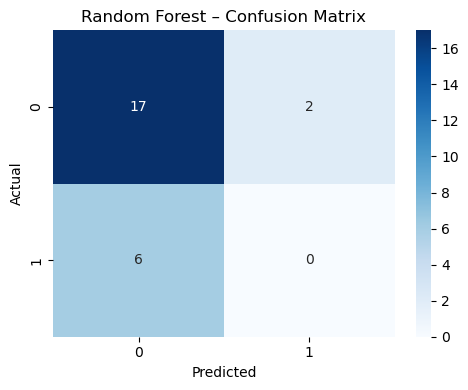

In [17]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True, fmt="d", cmap="Blues"
)
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [18]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


Company_Profit        0.074434
recency_days          0.063561
avg_spend             0.058673
spend_std             0.050363
avg_quantity          0.047866
avg_price_paid        0.047397
transactions_count    0.043150
price_std             0.042543
company_name_len      0.040010
total_quantity        0.039775
dtype: float64

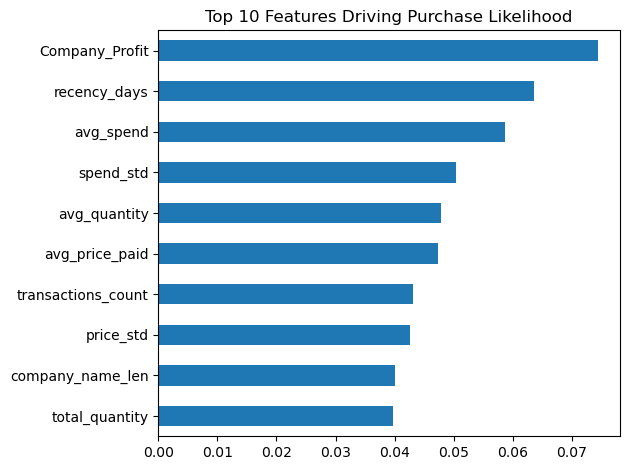

In [19]:
importances.head(10).plot(kind="barh")
plt.title("Top 10 Features Driving Purchase Likelihood")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


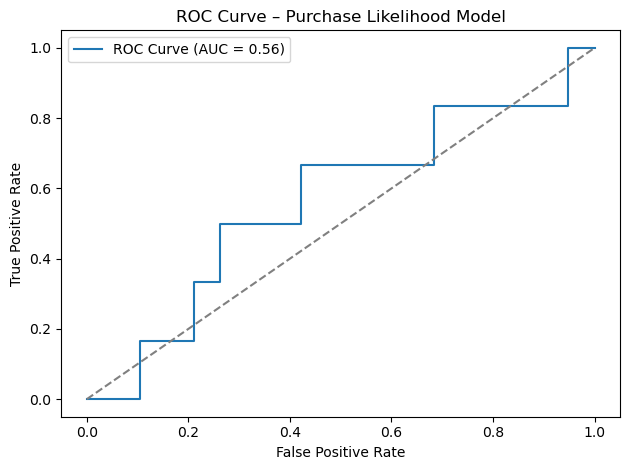

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Purchase Likelihood Model")
plt.legend()
plt.tight_layout()
plt.show()


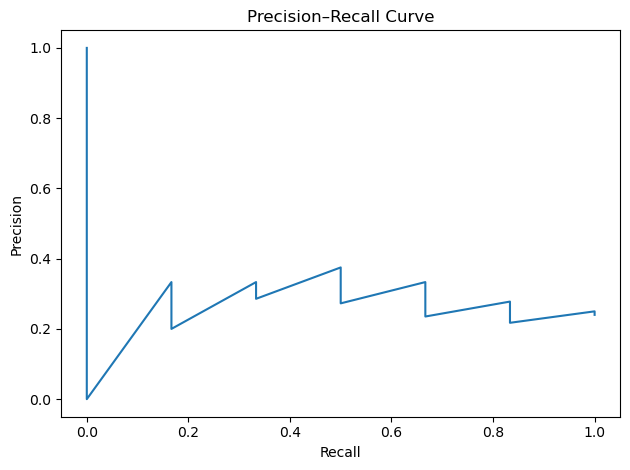

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.tight_layout()
plt.show()


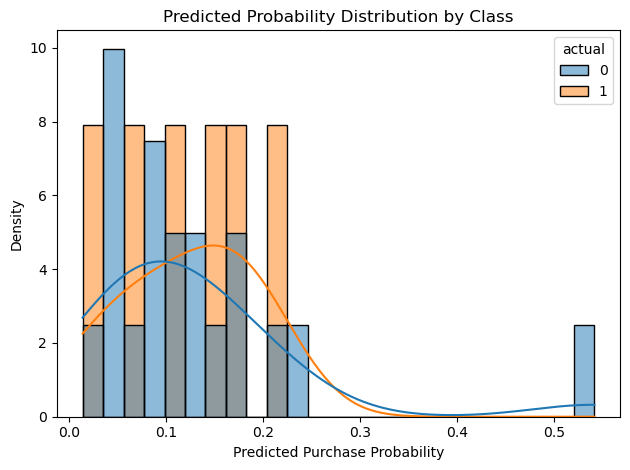

In [27]:
results = pd.DataFrame({
    "probability": y_prob,
    "actual": y_test.values
})

plt.figure()
sns.histplot(
    data=results,
    x="probability",
    hue="actual",
    bins=25,
    kde=True,
    stat="density",
    common_norm=False
)
plt.xlabel("Predicted Purchase Probability")
plt.title("Predicted Probability Distribution by Class")
plt.tight_layout()
plt.show()


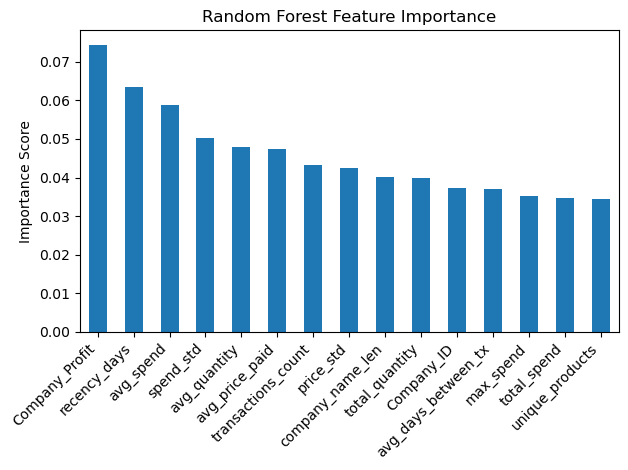

In [28]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure()
importances.head(15).plot(kind="bar")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


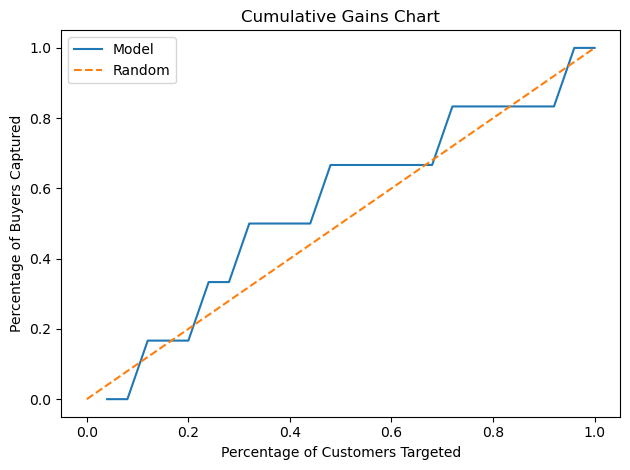

In [29]:
results_sorted = results.sort_values("probability", ascending=False)
results_sorted["cum_buyers"] = results_sorted["actual"].cumsum()
results_sorted["cum_pct_customers"] = np.arange(1, len(results_sorted)+1) / len(results_sorted)
results_sorted["cum_pct_buyers"] = results_sorted["cum_buyers"] / results_sorted["actual"].sum()

plt.figure()
plt.plot(results_sorted["cum_pct_customers"], results_sorted["cum_pct_buyers"], label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("Percentage of Customers Targeted")
plt.ylabel("Percentage of Buyers Captured")
plt.title("Cumulative Gains Chart")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 180)
plt.rcParams["figure.figsize"] = (10, 4)


In [34]:
TX_PATH = r"C:\Users\lawre\Downloads\transactions_data.csv"
PR_PATH = r"C:\Users\lawre\Downloads\products_data.csv"
CU_PATH = r"C:\Users\lawre\Downloads\customers_data (1).csv"

tx = pd.read_csv(TX_PATH)
pr = pd.read_csv(PR_PATH)
cu = pd.read_csv(CU_PATH)

print("Transactions:", tx.shape)
print("Products    :", pr.shape)
print("Customers   :", cu.shape)


Transactions: (10000, 8)
Products    : (20, 3)
Customers   : (100, 4)


In [35]:
tx_clean = tx.copy()

# Drop redundant index column
for c in list(tx_clean.columns):
    if "unnamed" in str(c).lower():
        tx_clean = tx_clean.drop(columns=[c])

# Convert IDs
for c in ["Transaction_ID", "Company_ID", "Product_ID"]:
    tx_clean[c] = pd.to_numeric(tx_clean[c], errors="coerce")

# Parse dates (no deprecated args)
tx_clean["Transaction_Date"] = pd.to_datetime(
    tx_clean["Transaction_Date"], errors="coerce"
)

# Numeric fields
for c in ["Quantity", "Product_Price", "Total_Cost"]:
    tx_clean[c] = pd.to_numeric(tx_clean[c], errors="coerce")

# Drop rows missing essential keys
tx_clean = tx_clean.dropna(
    subset=["Transaction_ID", "Company_ID", "Product_ID", "Transaction_Date"]
)

# Reconstruct Total_Cost where possible
mask = (
    tx_clean["Total_Cost"].isna()
    & tx_clean["Quantity"].notna()
    & tx_clean["Product_Price"].notna()
)
tx_clean.loc[mask, "Total_Cost"] = (
    tx_clean.loc[mask, "Quantity"] * tx_clean.loc[mask, "Product_Price"]
)

# Final numeric imputation
for c in ["Quantity", "Product_Price", "Total_Cost"]:
    tx_clean[c] = tx_clean[c].fillna(tx_clean[c].median())

tx_clean.head()


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,1.0,88.0,6.0,11.0,2024-03-26,194379.147964,1075200.0
5,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0
20,21.0,88.0,13.0,11.0,2024-09-08,210759.801449,392000.0
23,24.0,70.0,1.0,19.0,2021-05-03,145162.097359,2660000.0
33,34.0,92.0,8.0,11.0,2024-02-27,141578.710506,1814400.0


In [36]:
pr_clean = pr.copy()

pr_clean = pr_clean.dropna(subset=["Product_ID"])
pr_clean["Product_ID"] = pd.to_numeric(pr_clean["Product_ID"], errors="coerce")

def money_to_float(x):
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d,\.]", "", str(x))
    return pd.to_numeric(s.replace(",", ""), errors="coerce")

pr_clean["Product_Price"] = pr_clean["Product_Price"].apply(money_to_float)

pr_clean.head()


,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,140000
1,2.0,MarketMinder Analytics,168000
2,3.0,TrendWise Forecaster,100800
3,4.0,CustomerScope Insights,123200
4,5.0,SalesSync Optimizer,84000


In [37]:
cu_clean = cu.copy()

cu_clean = cu_clean.dropna(subset=["Company_ID"])
cu_clean["Company_ID"] = pd.to_numeric(cu_clean["Company_ID"], errors="coerce")

cu_clean["Company_Profit"] = pd.to_numeric(
    cu_clean["Company_Profit"], errors="coerce"
)
cu_clean["Company_Profit"] = cu_clean["Company_Profit"].fillna(
    cu_clean["Company_Profit"].median()
)

for col in ["Company_Name", "Address"]:
    cu_clean[col] = (
        cu_clean[col].astype(str).str.strip().replace(
            {"": "Unknown", "nan": "Unknown", "None": "Unknown"}
        )
    )

cu_clean.head()


,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,74653.0,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"


In [38]:
df = tx_clean.merge(
    pr_clean, on="Product_ID", how="left", suffixes=("", "_master")
)
df = df.merge(cu_clean, on="Company_ID", how="left")

print("Merged df shape:", df.shape)
df.head()


Merged df shape: (1830, 12)


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost,Product_Name,Product_Price_master,Company_Name,Company_Profit,Address
0,1.0,88.0,6.0,11.0,2024-03-26,194379.147964,1075200.0,RevenueVue Dashboard,179200.0,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines"
1,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,OptiFlow Automation,156800.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip..."
2,21.0,88.0,13.0,11.0,2024-09-08,210759.801449,392000.0,ForecastXcelerator,196000.0,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines"
3,24.0,70.0,1.0,19.0,2021-05-03,145162.097359,2660000.0,FinPredictor Suite,140000.0,Prime Network 70,62252.0,"Alabang-Zapote Rd, Barangay 456, Baguio, Phili..."
4,34.0,92.0,8.0,11.0,2024-02-27,141578.710506,1814400.0,NaN,NaN,Innovative Corp 92,62959.0,"Taft ave, barangay 202, baguio, philippines"


TECHNICAL INSIGHT:
High-revenue products indicate strong demand and are key business drivers.



,total_transactions,total_quantity,total_revenue,avg_price
Product_Name,,,,
FinSphere Intelligence Suite,86,955.0,2.113681e+08,210477.138250
RevenueVue Dashboard,101,1134.0,1.993880e+08,174207.135795
ForecastXcelerator,96,986.0,1.864596e+08,186832.173582
MarketMinder Analytics,104,1113.0,1.837080e+08,163344.813727
OptiFlow Automation,103,1180.0,1.806795e+08,156594.836756
RealTime Revenue,88,1028.0,1.680132e+08,164842.121246
DataBridge Integration Tool,89,903.0,1.360345e+08,149565.711944
Product 9,101,1165.0,1.313173e+08,114273.575393
FinPredictor Suite,86,874.0,1.269685e+08,139389.998387


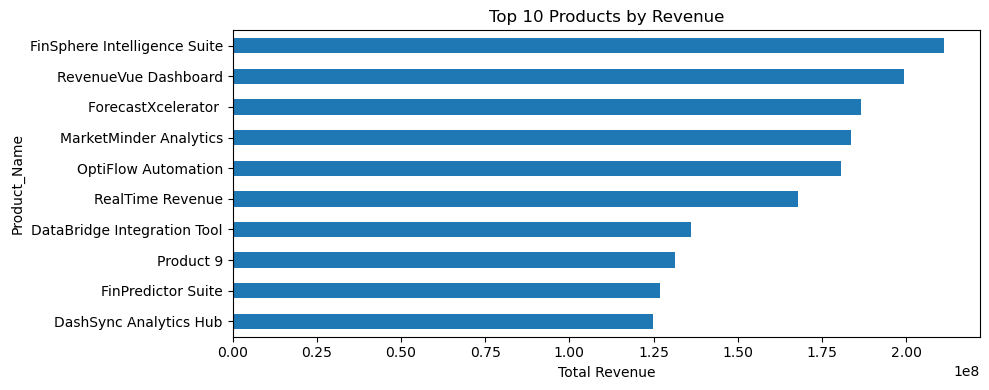

In [39]:
product_perf = df.groupby("Product_Name").agg(
    total_transactions=("Transaction_ID", "count"),
    total_quantity=("Quantity", "sum"),
    total_revenue=("Total_Cost", "sum"),
    avg_price=("Product_Price", "mean")
).sort_values("total_revenue", ascending=False)

print(
    "TECHNICAL INSIGHT:\n"
    "High-revenue products indicate strong demand and are key business drivers.\n"
)

display(product_perf.head(10))

product_perf.head(10)["total_revenue"].plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


TECHNICAL INSIGHT:
Transaction frequency and spend approximate customer loyalty and value.



,transaction_count,total_spend,avg_order_value,unique_products
count,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,18.300000,2.628819e+07,1.433255e+06,11.860000
std,4.459696,7.507481e+06,2.385054e+05,2.287516
min,8.000000,8.507556e+06,7.105179e+05,6.000000
25%,15.000000,2.167744e+07,1.311400e+06,10.000000
50%,18.000000,2.639517e+07,1.441241e+06,12.000000
75%,21.000000,3.116682e+07,1.571628e+06,13.000000
max,31.000000,4.809495e+07,2.103852e+06,16.000000


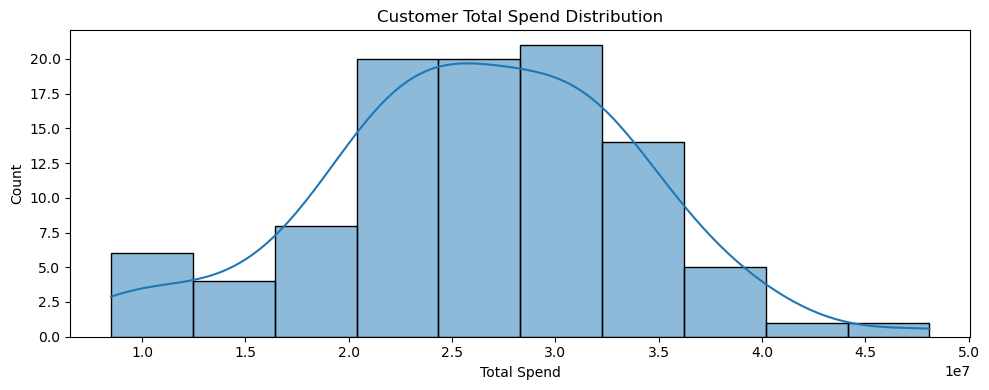

In [40]:
customer_behavior = df.groupby("Company_ID").agg(
    transaction_count=("Transaction_ID", "count"),
    total_spend=("Total_Cost", "sum"),
    avg_order_value=("Total_Cost", "mean"),
    unique_products=("Product_ID", "nunique")
)

print(
    "TECHNICAL INSIGHT:\n"
    "Transaction frequency and spend approximate customer loyalty and value.\n"
)

display(customer_behavior.describe())

sns.histplot(customer_behavior["total_spend"], kde=True)
plt.title("Customer Total Spend Distribution")
plt.xlabel("Total Spend")
plt.tight_layout()
plt.show()


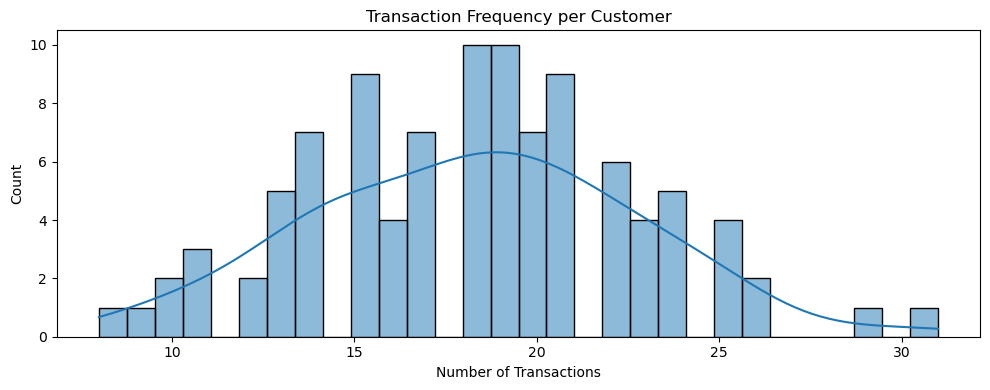

INTERPRETATION:
Customers with higher transaction frequency are more likely to repurchase.



In [41]:
sns.histplot(customer_behavior["transaction_count"], bins=30, kde=True)
plt.title("Transaction Frequency per Customer")
plt.xlabel("Number of Transactions")
plt.tight_layout()
plt.show()

print(
    "INTERPRETATION:\n"
    "Customers with higher transaction frequency are more likely to repurchase.\n"
)


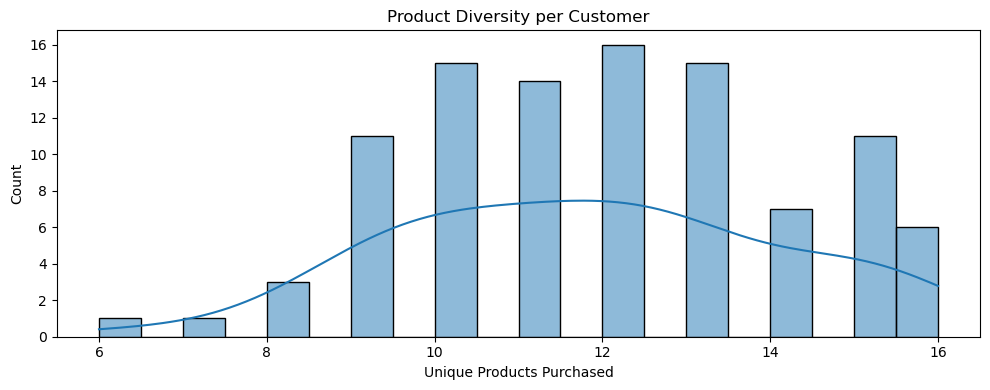

INTERPRETATION:
Higher product diversity is associated with stronger engagement and retention.



In [42]:
sns.histplot(customer_behavior["unique_products"], bins=20, kde=True)
plt.title("Product Diversity per Customer")
plt.xlabel("Unique Products Purchased")
plt.tight_layout()
plt.show()

print(
    "INTERPRETATION:\n"
    "Higher product diversity is associated with stronger engagement and retention.\n"
)


In [43]:
print(
    "MODEL JUSTIFICATION:\n"
    "The following features are validated for purchase likelihood prediction:\n"
    "- Transaction frequency\n"
    "- Total spend\n"
    "- Product diversity\n"
    "- Recent transaction activity\n"
)


MODEL JUSTIFICATION:
The following features are validated for purchase likelihood prediction:
- Transaction frequency
- Total spend
- Product diversity
- Recent transaction activity



BEHAVIORAL METRIC: RECENCY (days since last purchase)
Interpretation: Lower recency_days = more recently engaged = higher repurchase likelihood.



count    100.000000
mean      88.110000
std       84.106462
min        0.000000
25%       25.750000
50%       61.000000
75%      134.250000
max      380.000000
Name: recency_days, dtype: float64

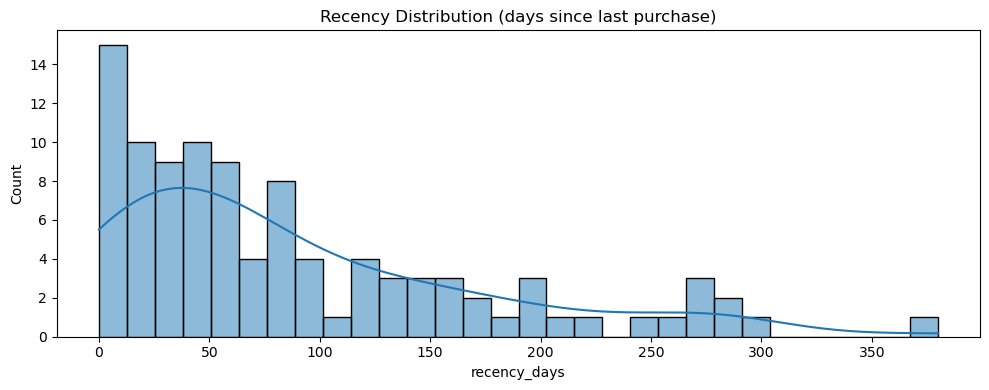


BEHAVIORAL METRIC: FREQUENCY (transaction_count)
Interpretation: Higher transaction_count indicates loyalty / repeat purchasing.



count    100.000000
mean      18.300000
std        4.459696
min        8.000000
25%       15.000000
50%       18.000000
75%       21.000000
max       31.000000
Name: transaction_count, dtype: float64

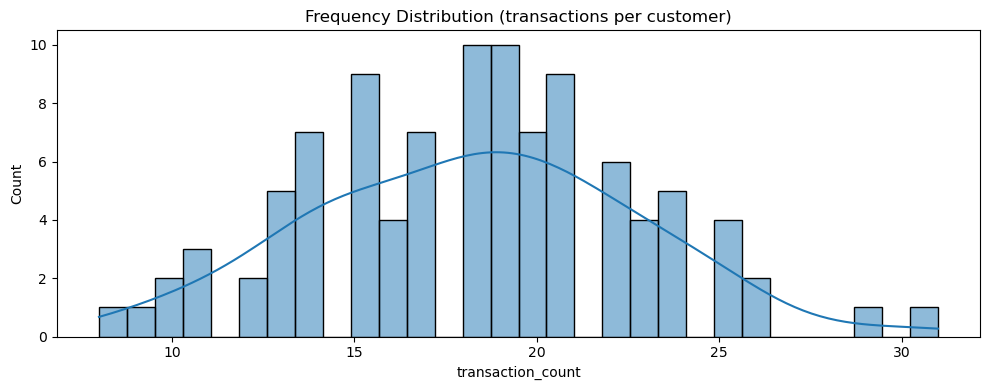


BEHAVIORAL METRIC: MONETARY (total_spend, avg_order_value)
Interpretation: Higher spend often correlates with higher customer value and retention.



,total_spend,avg_order_value
count,1.000000e+02,1.000000e+02
mean,2.628819e+07,1.433255e+06
std,7.507481e+06,2.385054e+05
min,8.507556e+06,7.105179e+05
25%,2.167744e+07,1.311400e+06
50%,2.639517e+07,1.441241e+06
75%,3.116682e+07,1.571628e+06
max,4.809495e+07,2.103852e+06


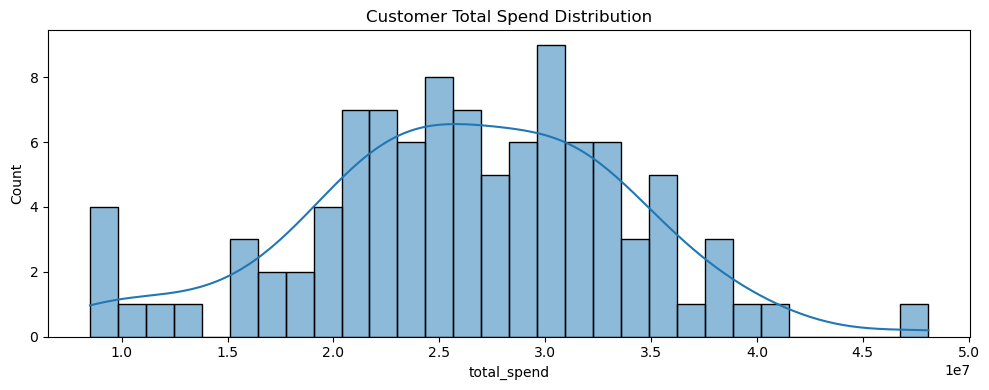

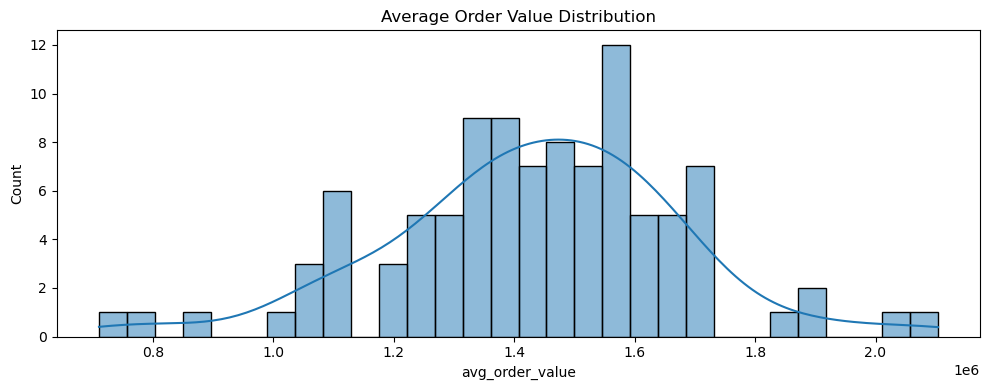


BEHAVIORAL METRIC: PRODUCT DIVERSITY (unique_products)
Interpretation: Higher product diversity suggests stronger engagement and cross-sell adoption.



count    100.000000
mean      11.860000
std        2.287516
min        6.000000
25%       10.000000
50%       12.000000
75%       13.000000
max       16.000000
Name: unique_products, dtype: float64

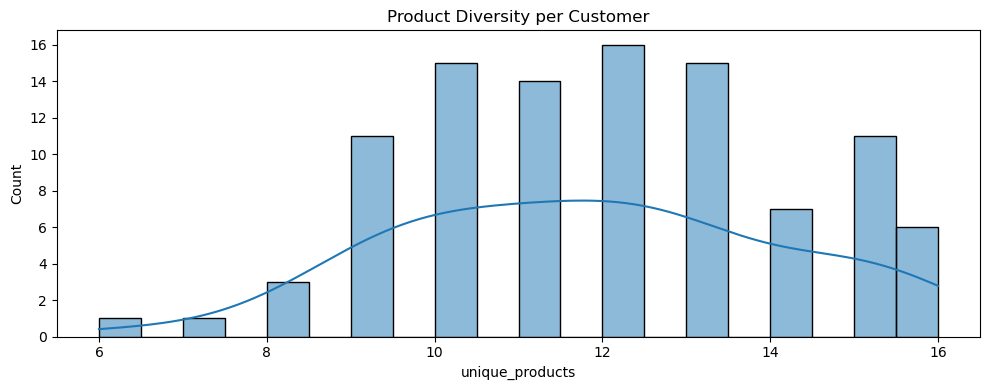


ENGAGEMENT TREND: Monthly transactions, revenue, and active customers
Interpretation: Identifies seasonality, growth/decline, and activity spikes.



,month,transactions,revenue,active_customers
37,2023-11,39,6.027429e+07,32
38,2023-12,47,7.298824e+07,39
39,2024-01,46,5.822952e+07,39
40,2024-02,31,3.910220e+07,27
41,2024-03,40,6.828939e+07,37
42,2024-04,21,3.054637e+07,19
43,2024-05,34,5.305077e+07,28
44,2024-06,41,5.427601e+07,31
45,2024-07,30,4.544430e+07,28
46,2024-08,34,4.842947e+07,28


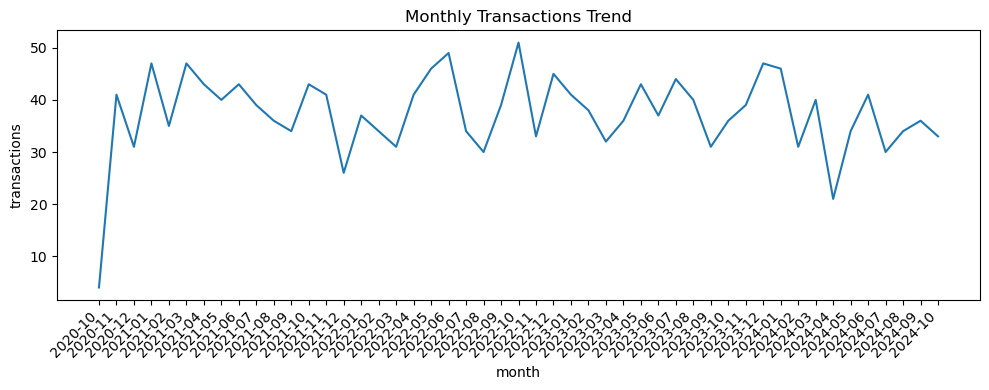

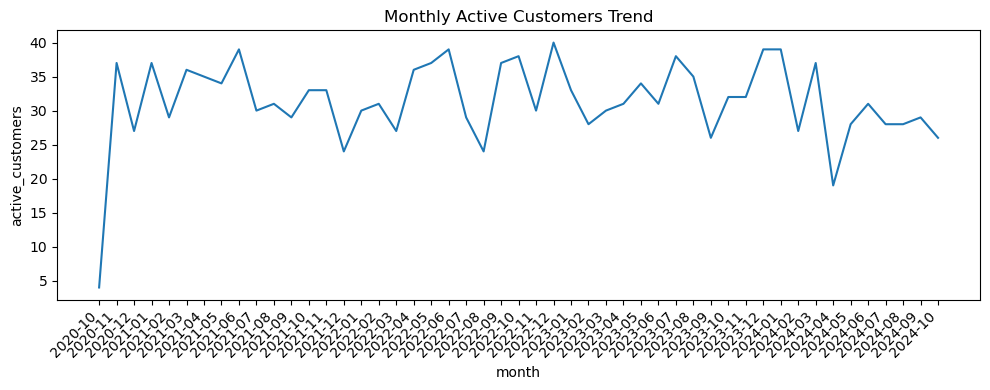


BEHAVIORAL METRIC: Inter-purchase time (avg gap in days)
Interpretation: Smaller gaps indicate habitual buying; larger gaps indicate irregular engagement.



C:\Users\lawre\AppData\Local\Temp\ipykernel_10144\3344659640.py:154: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gap_series = df.groupby("Company_ID").apply(avg_gap_days)


count    100.000000
mean      81.070974
std       23.962591
min       41.892857
25%       66.159559
50%       77.334034
75%       92.126923
max      203.857143
Name: avg_days_between_tx, dtype: float64

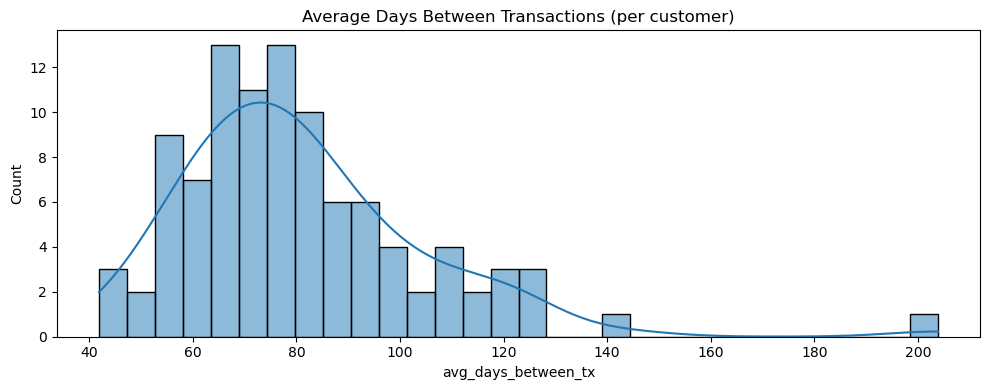


CUSTOMER SEGMENTATION (RFM-style)
Interpretation: Segments help prioritize marketing actions (retain, re-engage, upsell).



segment
Active / Growing            39
High Value / Loyal          24
Occasional                  20
At Risk / Low Engagement    17
Name: count, dtype: int64

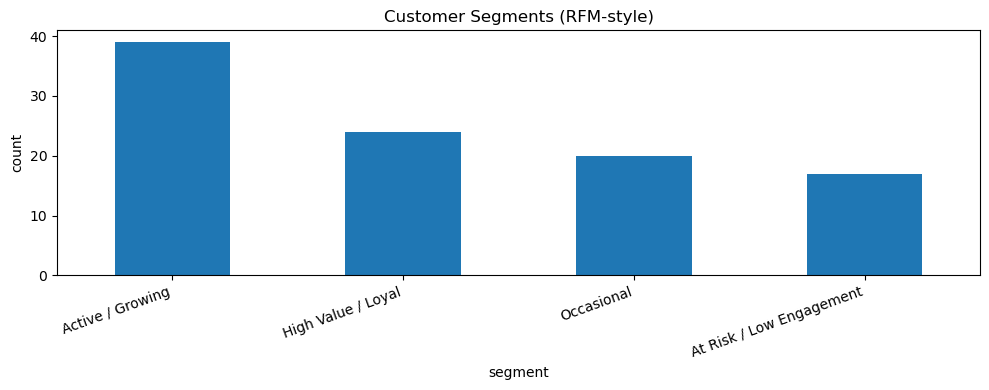


MODEL JUSTIFICATION (Behavioral & Engagement Features):
- recency_days and avg_days_between_tx capture engagement freshness and cadence.
- transaction_count and total_spend capture loyalty and customer value.
- unique_products captures breadth of product adoption (cross-sell potential).
- monthly trends show seasonality and macro changes in engagement.



In [45]:
# ============================================================
# BEHAVIORAL & ENGAGEMENT DATA ANALYSIS (FinMark) — FIXED/ROBUST
# Fixes common issues:
# - df not defined / missing required columns
# - Transaction_Date not datetime
# - qcut errors when many duplicates or too few unique values
# - alignment issues when assigning gap_series back to customer_behavior
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0) REQUIRED CHECKS
# -----------------------------
required_cols = ["Company_ID", "Transaction_ID", "Product_ID", "Transaction_Date", "Total_Cost", "Quantity", "Product_Price"]
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"df is missing required columns: {missing_cols}\n"
                     f"Current df columns: {list(df.columns)}")

# Ensure datetime
if not np.issubdtype(df["Transaction_Date"].dtype, np.datetime64):
    df = df.copy()
    df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")

# Drop rows with invalid dates (important for recency/monthly trend)
df = df.dropna(subset=["Transaction_Date"]).copy()

# -----------------------------
# 1) Build customer_behavior (always rebuild to avoid stale / mismatched index)
# -----------------------------
customer_behavior = df.groupby("Company_ID").agg(
    transaction_count=("Transaction_ID", "count"),
    total_spend=("Total_Cost", "sum"),
    avg_order_value=("Total_Cost", "mean"),
    unique_products=("Product_ID", "nunique"),
    first_tx=("Transaction_Date", "min"),
    last_tx=("Transaction_Date", "max"),
)

# ============================================================
# 2) RECENCY
# ============================================================
ref_date = df["Transaction_Date"].max()
customer_behavior = customer_behavior.copy()
customer_behavior["recency_days"] = (ref_date - customer_behavior["last_tx"]).dt.days

print("BEHAVIORAL METRIC: RECENCY (days since last purchase)")
print("Interpretation: Lower recency_days = more recently engaged = higher repurchase likelihood.\n")
display(customer_behavior["recency_days"].describe())

sns.histplot(customer_behavior["recency_days"], bins=30, kde=True)
plt.title("Recency Distribution (days since last purchase)")
plt.xlabel("recency_days")
plt.tight_layout()
plt.show()

# ============================================================
# 3) FREQUENCY
# ============================================================
print("\nBEHAVIORAL METRIC: FREQUENCY (transaction_count)")
print("Interpretation: Higher transaction_count indicates loyalty / repeat purchasing.\n")
display(customer_behavior["transaction_count"].describe())

sns.histplot(customer_behavior["transaction_count"], bins=30, kde=True)
plt.title("Frequency Distribution (transactions per customer)")
plt.xlabel("transaction_count")
plt.tight_layout()
plt.show()

# ============================================================
# 4) MONETARY
# ============================================================
print("\nBEHAVIORAL METRIC: MONETARY (total_spend, avg_order_value)")
print("Interpretation: Higher spend often correlates with higher customer value and retention.\n")
display(customer_behavior[["total_spend", "avg_order_value"]].describe())

sns.histplot(customer_behavior["total_spend"], bins=30, kde=True)
plt.title("Customer Total Spend Distribution")
plt.xlabel("total_spend")
plt.tight_layout()
plt.show()

sns.histplot(customer_behavior["avg_order_value"], bins=30, kde=True)
plt.title("Average Order Value Distribution")
plt.xlabel("avg_order_value")
plt.tight_layout()
plt.show()

# ============================================================
# 5) PRODUCT DIVERSITY
# ============================================================
print("\nBEHAVIORAL METRIC: PRODUCT DIVERSITY (unique_products)")
print("Interpretation: Higher product diversity suggests stronger engagement and cross-sell adoption.\n")
display(customer_behavior["unique_products"].describe())

sns.histplot(customer_behavior["unique_products"], bins=20, kde=True)
plt.title("Product Diversity per Customer")
plt.xlabel("unique_products")
plt.tight_layout()
plt.show()

# ============================================================
# 6) ENGAGEMENT OVER TIME (MONTHLY TREND)
# ============================================================
print("\nENGAGEMENT TREND: Monthly transactions, revenue, and active customers")
print("Interpretation: Identifies seasonality, growth/decline, and activity spikes.\n")

df_monthly = df.copy()
df_monthly["month"] = df_monthly["Transaction_Date"].dt.to_period("M").astype(str)

monthly_trend = df_monthly.groupby("month").agg(
    transactions=("Transaction_ID", "count"),
    revenue=("Total_Cost", "sum"),
    active_customers=("Company_ID", "nunique"),
).reset_index()

display(monthly_trend.tail(12))

plt.figure()
plt.plot(monthly_trend["month"], monthly_trend["transactions"])
plt.title("Monthly Transactions Trend")
plt.xlabel("month")
plt.ylabel("transactions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(monthly_trend["month"], monthly_trend["active_customers"])
plt.title("Monthly Active Customers Trend")
plt.xlabel("month")
plt.ylabel("active_customers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ============================================================
# 7) INTER-PURCHASE TIME (AVG GAP)
# ============================================================
print("\nBEHAVIORAL METRIC: Inter-purchase time (avg gap in days)")
print("Interpretation: Smaller gaps indicate habitual buying; larger gaps indicate irregular engagement.\n")

def avg_gap_days(group):
    d = group.sort_values("Transaction_Date")["Transaction_Date"].values
    if len(d) < 2:
        return np.nan
    gaps = np.diff(d).astype("timedelta64[D]").astype(int)
    return float(np.mean(gaps))

gap_series = df.groupby("Company_ID").apply(avg_gap_days)
# Align indexes safely
customer_behavior["avg_days_between_tx"] = gap_series.reindex(customer_behavior.index)

display(customer_behavior["avg_days_between_tx"].describe())

sns.histplot(customer_behavior["avg_days_between_tx"].dropna(), bins=30, kde=True)
plt.title("Average Days Between Transactions (per customer)")
plt.xlabel("avg_days_between_tx")
plt.tight_layout()
plt.show()

# ============================================================
# 8) SIMPLE SEGMENTATION (RFM-STYLE) — ROBUST QCUT
# ============================================================
print("\nCUSTOMER SEGMENTATION (RFM-style)")
print("Interpretation: Segments help prioritize marketing actions (retain, re-engage, upsell).\n")

cb = customer_behavior.copy()

# Robust qcut: handle duplicates / low unique values
def safe_qcut(series, q=4, labels=None, ascending=True):
    s = series.copy()
    # If too few unique values, fallback to cut on rank
    if s.nunique(dropna=True) < q:
        s = s.rank(method="average")
    if not ascending:
        s = -s
    try:
        return pd.qcut(s, q, labels=labels, duplicates="drop")
    except ValueError:
        # fallback: fewer bins
        q2 = min(q, max(2, s.nunique(dropna=True)))
        return pd.qcut(s, q2, labels=labels[:q2] if labels else None, duplicates="drop")

cb["R_score"] = safe_qcut(cb["recency_days"], q=4, labels=[4,3,2,1], ascending=True)   # lower recency = better
cb["F_score"] = safe_qcut(cb["transaction_count"], q=4, labels=[1,2,3,4], ascending=True)
cb["M_score"] = safe_qcut(cb["total_spend"], q=4, labels=[1,2,3,4], ascending=True)

# Convert to int safely (in case bins dropped)
cb["R_score"] = cb["R_score"].astype(int)
cb["F_score"] = cb["F_score"].astype(int)
cb["M_score"] = cb["M_score"].astype(int)

cb["RFM_score"] = cb["R_score"] + cb["F_score"] + cb["M_score"]

def segment_label(score):
    if score >= 10:
        return "High Value / Loyal"
    if score >= 7:
        return "Active / Growing"
    if score >= 5:
        return "Occasional"
    return "At Risk / Low Engagement"

cb["segment"] = cb["RFM_score"].apply(segment_label)

segment_counts = cb["segment"].value_counts()
display(segment_counts)

segment_counts.plot(kind="bar")
plt.title("Customer Segments (RFM-style)")
plt.xlabel("segment")
plt.ylabel("count")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

print(
    "\nMODEL JUSTIFICATION (Behavioral & Engagement Features):\n"
    "- recency_days and avg_days_between_tx capture engagement freshness and cadence.\n"
    "- transaction_count and total_spend capture loyalty and customer value.\n"
    "- unique_products captures breadth of product adoption (cross-sell potential).\n"
    "- monthly trends show seasonality and macro changes in engagement.\n"
)


CUSTOMER DEMOGRAPHICS & FIRMOGRAPHICS ANALYSIS

Available demographic / firmographic fields:
['Company_Name', 'Address', 'Company_Profit']

Interpretation:
These attributes describe customer characteristics such as firm size,
location, and profitability, which may influence purchasing behavior.

FIRMOGRAPHIC ANALYSIS: Company Profit
Company profit serves as a proxy for firm size and purchasing capacity.
Higher-profit firms are expected to generate higher transaction values.



count      1654.000000
mean      76964.126965
std       25496.297180
min       30663.000000
25%       55028.000000
50%       74653.000000
75%       99726.000000
max      118114.000000
Name: Company_Profit, dtype: float64

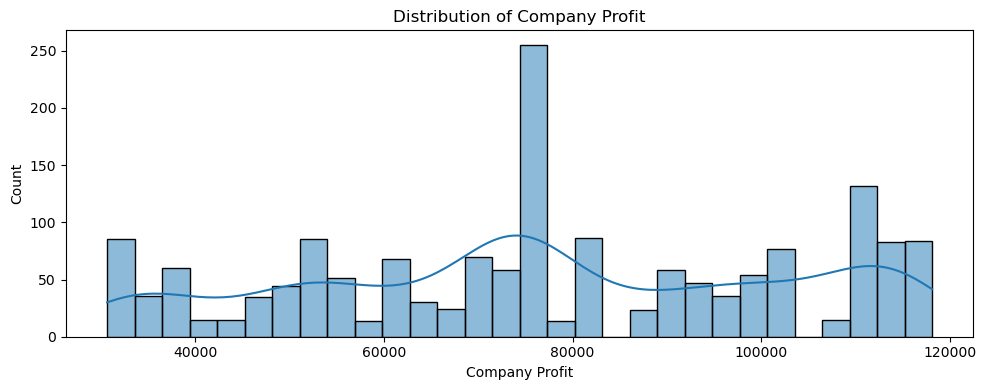

LINKING DEMOGRAPHICS & FIRMOGRAPHICS TO BEHAVIOR
This section evaluates whether firmographic attributes
correlate with purchasing intensity and customer value.



,company_profit,total_spend,transaction_count
count,90.000000,1.000000e+02,100.000000
mean,76090.955556,2.628819e+07,18.300000
std,25554.297218,7.507481e+06,4.459696
min,30663.000000,8.507556e+06,8.000000
25%,54896.750000,2.167744e+07,15.000000
50%,74653.000000,2.639517e+07,18.000000
75%,98896.250000,3.116682e+07,21.000000
max,118114.000000,4.809495e+07,31.000000


MODEL JUSTIFICATION: DEMOGRAPHICS & FIRMOGRAPHICS
- Company_Profit approximates firm purchasing power and scale
- Industry captures sector-specific demand patterns
- Geographic location reflects regional market behavior
- Firmographic segmentation improves customer purchase prediction


END OF CUSTOMER DEMOGRAPHICS & FIRMOGRAPHICS ANALYSIS ✅


In [47]:
# ============================================================
# CUSTOMER DEMOGRAPHICS & FIRMOGRAPHICS ANALYSIS (SINGLE CELL)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("CUSTOMER DEMOGRAPHICS & FIRMOGRAPHICS ANALYSIS\n")

# ------------------------------------------------------------
# 1) CHECK AVAILABLE DEMOGRAPHIC / FIRMOGRAPHIC COLUMNS
# ------------------------------------------------------------
possible_demo_cols = [
    "Company_Name",
    "Address",
    "City",
    "Country",
    "Industry",
    "Company_Profit",
    "Company_Size",
    "Employee_Count"
]

available_demo_cols = [c for c in possible_demo_cols if c in df.columns]

print("Available demographic / firmographic fields:")
print(available_demo_cols)
print("\nInterpretation:")
print(
    "These attributes describe customer characteristics such as firm size,\n"
    "location, and profitability, which may influence purchasing behavior.\n"
)

# ------------------------------------------------------------
# 2) COMPANY PROFIT DISTRIBUTION (FIRMOGRAPHIC)
# ------------------------------------------------------------
if "Company_Profit" in df.columns:

    print("="*60)
    print("FIRMOGRAPHIC ANALYSIS: Company Profit")
    print("="*60)
    print(
        "Company profit serves as a proxy for firm size and purchasing capacity.\n"
        "Higher-profit firms are expected to generate higher transaction values.\n"
    )

    display(df["Company_Profit"].describe())

    sns.histplot(df["Company_Profit"], bins=30, kde=True)
    plt.title("Distribution of Company Profit")
    plt.xlabel("Company Profit")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 3) GEOGRAPHIC DISTRIBUTION (DEMOGRAPHIC)
# ------------------------------------------------------------
if "Country" in df.columns:

    print("="*60)
    print("DEMOGRAPHIC ANALYSIS: Geographic Distribution")
    print("="*60)
    print(
        "Geographic distribution highlights regional demand concentration\n"
        "and potential market segmentation opportunities.\n"
    )

    country_counts = df["Country"].value_counts().head(10)
    display(country_counts)

    country_counts.plot(kind="bar")
    plt.title("Top 10 Countries by Transaction Volume")
    plt.xlabel("Country")
    plt.ylabel("Transaction Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 4) INDUSTRY-LEVEL ANALYSIS (IF AVAILABLE)
# ------------------------------------------------------------
if "Industry" in df.columns:

    print("="*60)
    print("FIRMOGRAPHIC ANALYSIS: Industry Segmentation")
    print("="*60)
    print(
        "Industry classification helps identify which sectors\n"
        "drive the most transactions and revenue.\n"
    )

    industry_perf = df.groupby("Industry").agg(
        transactions=("Transaction_ID", "count"),
        total_revenue=("Total_Cost", "sum")
    ).sort_values("total_revenue", ascending=False)

    display(industry_perf.head(10))

    industry_perf.head(10)["total_revenue"].plot(kind="barh")
    plt.title("Top Industries by Revenue")
    plt.xlabel("Total Revenue")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 5) LINK FIRMOGRAPHICS TO PURCHASING BEHAVIOR
# ------------------------------------------------------------
print("="*60)
print("LINKING DEMOGRAPHICS & FIRMOGRAPHICS TO BEHAVIOR")
print("="*60)
print(
    "This section evaluates whether firmographic attributes\n"
    "correlate with purchasing intensity and customer value.\n"
)

firm_behavior = df.groupby("Company_ID").agg(
    company_profit=("Company_Profit", "first") if "Company_Profit" in df.columns else ("Company_ID", "count"),
    total_spend=("Total_Cost", "sum"),
    transaction_count=("Transaction_ID", "count")
)

display(firm_behavior.describe())

if "Company_Profit" in firm_behavior.columns:
    sns.scatterplot(
        data=firm_behavior,
        x="company_profit",
        y="total_spend"
    )
    plt.title("Company Profit vs Total Spend")
    plt.xlabel("Company Profit")
    plt.ylabel("Total Spend")
    plt.tight_layout()
    plt.show()

    print(
        "Technical Interpretation:\n"
        "- A positive relationship suggests higher-profit firms tend to spend more.\n"
        "- Firmographic attributes therefore add predictive value to purchase models.\n"
    )

# ------------------------------------------------------------
# 6) FIRMOGRAPHIC-BASED SEGMENTATION
# ------------------------------------------------------------
if "Company_Profit" in firm_behavior.columns:

    print("="*60)
    print("FIRMOGRAPHIC SEGMENTATION")
    print("="*60)
    print(
        "Segmenting customers by firmographic value enables\n"
        "targeted marketing and differentiated engagement strategies.\n"
    )

    firm_behavior["value_segment"] = pd.qcut(
        firm_behavior["company_profit"],
        q=3,
        labels=["Low Profit Firms", "Mid Profit Firms", "High Profit Firms"],
        duplicates="drop"
    )

    segment_summary = firm_behavior.groupby("value_segment").agg(
        avg_spend=("total_spend", "mean"),
        avg_transactions=("transaction_count", "mean"),
        firm_count=("total_spend", "count")
    )

    display(segment_summary)

    segment_summary["avg_spend"].plot(kind="bar")
    plt.title("Average Spend by Firmographic Segment")
    plt.ylabel("Average Spend")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 7) MODEL JUSTIFICATION (PRINTED)
# ------------------------------------------------------------
print("="*60)
print("MODEL JUSTIFICATION: DEMOGRAPHICS & FIRMOGRAPHICS")
print("="*60)
print(
    "- Company_Profit approximates firm purchasing power and scale\n"
    "- Industry captures sector-specific demand patterns\n"
    "- Geographic location reflects regional market behavior\n"
    "- Firmographic segmentation improves customer purchase prediction\n"
)

print("\nEND OF CUSTOMER DEMOGRAPHICS & FIRMOGRAPHICS ANALYSIS ✅")
